In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
import sys
sys.path.append('../')
import utils

train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = utils.read_files()
keys = [1, 2, 3]

In [20]:
frames_train_estimated = [X_train_estimated_a, X_train_estimated_b, X_train_estimated_c]
X_train_estimated = pd.concat(frames_train_estimated, keys=keys)
X_train_estimated.reset_index(level=0, inplace=True, names='location')

frames_train_observed = [X_train_observed_a, X_train_observed_b, X_train_observed_c]
X_train_observed = pd.concat(frames_train_observed, keys=keys)
X_train_observed.reset_index(level=0, inplace=True, names='location')

frames_test_estimated = [X_test_estimated_a, X_test_estimated_b, X_test_estimated_c]
X_test_estimated = pd.concat(frames_test_estimated, keys=keys)
X_test_estimated.reset_index(level=0, inplace=True, names='location')

In [21]:
X_train_estimated_merged = pd.concat(frames_train_estimated, axis=1)
X_train_estimated_merged.reset_index(drop=True, inplace=True)

X_train_observed_merged = pd.concat(frames_train_observed, axis=1)
X_train_observed_merged.reset_index(drop=True, inplace=True)

X_test_estimated_merged = pd.concat(frames_test_estimated, axis=1)
X_test_estimated_merged.reset_index(drop=True, inplace=True)

In [22]:
frames = [[X_train_estimated_a, train_a], [X_train_observed_a, train_a.dropna()]]
X_train_observed_merged_result = pd.concat(frames[1], axis=0)
X_train_observed_merged_result.reset_index(drop=True, inplace=True)

### 1. X train estimated

On regarde la matrice de corrélation de \[X_train_estimated_abc\]:

On obtient grossièrement la même matrice pour aa, ab, ac, bb, bc

In [23]:
utils.build_corr_matrix(X_train_estimated_merged, figsize=(100,100), annot=True)

In [24]:
X_test_estimated.keys()

Index(['location', 'date_calc', 'date_forecast', 'absolute_humidity_2m:gm3',
       'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J',
       'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_density:kgm3', 'snow_depth:cm',
       'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2',
       'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m',
       'wind_speed_10m:ms

On voit que la localisation est corrélée à 79 % ( .89 * .89 ) à la hauteur de la mesure -> logique et cohérent avec le dernier résultat
Sinon elle n'est corrélée à aucune autre variable à priori

Cette matrice de corrélation est par contre un peu différente de celles qui sont prises localisation par localisation (suite):

Mais on peut regrouper les variables fortement corrélées:

- date_calc, date_forecast: logique
- date_calc, absolute_humidity_2m:gm3: $\sim 60\%$
- date_calc, air_density_2m:kgm3: $\sim 50\%$
- date_calc, dew_point_2m: 
- dew_point_2m, absolute_humidity_2m:gm3: $\sim 98\%$ (point de rosée)
- 

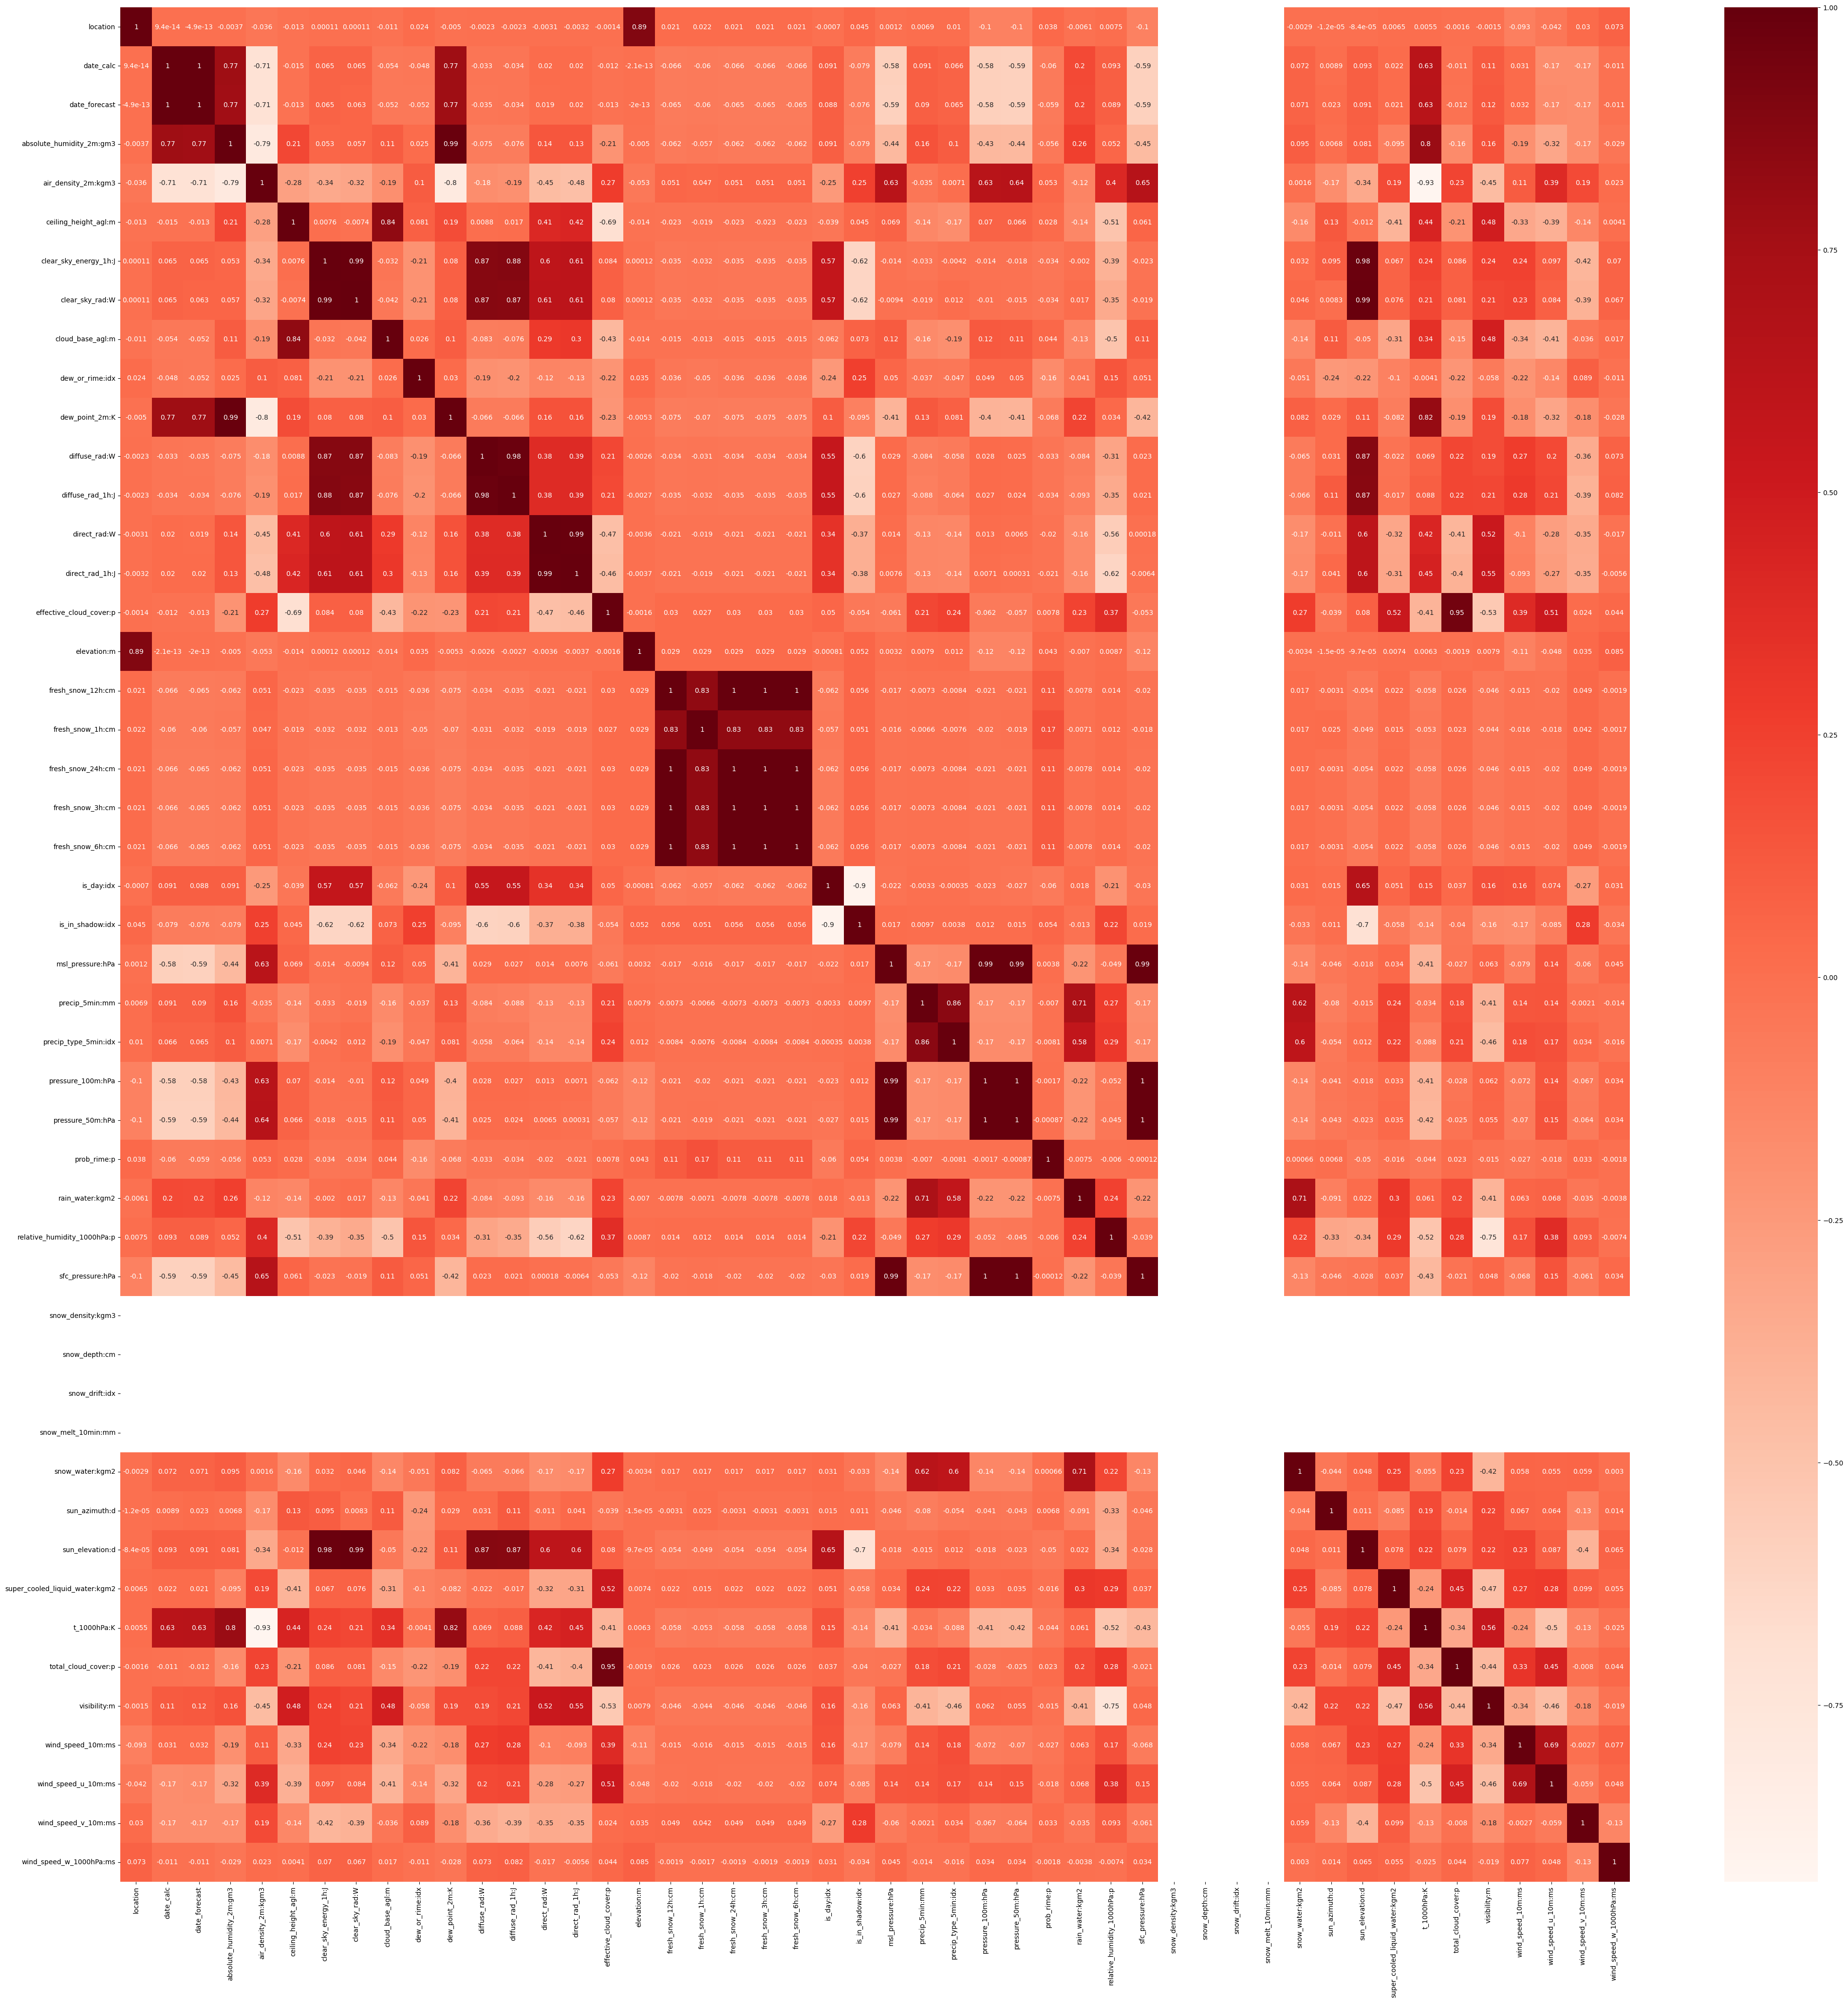

In [25]:
utils.build_corr_matrix(X_test_estimated, figsize=(50,50))